<a href="https://colab.research.google.com/github/bakeunbi99/Colab/blob/main/Ch2.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/8_MNIST_%EC%88%AB%EC%9E%90%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/10/20 15:34
내용 : MNIST 숫자이미지 실습하기
784 픽셀로 이루어진 이미지 (0~255 사이 숫자로 색상 표현) 60000만장
총 785 columns(lobel = 숫자, 1...784 색상)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 불러오기
df_mnist_train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_train.csv')
df_mnist_test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_test.csv')
df_mnist_train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show>

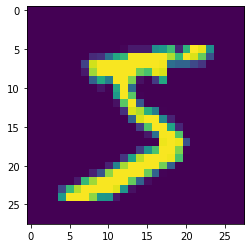

In [ ]:
# 픽셀 데이터 이미지 출력
img_list = df_mnist_train_data.iloc[0, 1:].tolist() # 첫번째 행의 1~마지막 열까지 (선형)
img = np.reshape(img_list, [28, 28]) # 구조바꾸기 (가로:28, 세로:28)
plt.imshow(img)
plt.show


In [ ]:
# 학습데이터 만들기
mnist_train_data = df_mnist_train_data.iloc[:, 1:] / 255
mnist_train_label = df_mnist_train_data.iloc[:, 0]
print(mnist_train_data.shape)

mnist_test_data = df_mnist_test_data.iloc[:, 1:] / 255
mnist_test_label = df_mnist_test_data.iloc[:, 0]
print(mnist_test_data.shape)

(60000, 784)
(10000, 784)


In [ ]:
# 학습하기
model = svm.SVC()
model.fit(mnist_train_data, mnist_train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# 테스트 코드
result = model.predict(mnist_test_data)

In [ ]:
# 성능 평가
score = metrics.accuracy_score(result, mnist_test_label)
score

0.9792

0
1
2
3
4
5
6
7
8
9


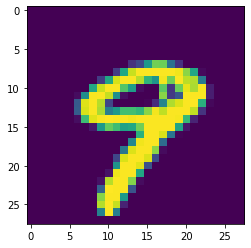

In [ ]:
# 검증
row = 0
img_list[0]

for i in range(10):
  print(i)
  img_list[i] = mnist_test_data.iloc[i, :].tolist()
  img = np.reshape(img_list[i], [28, 28])
  plt.imshow(img)
  plt.show

  # answer = model.predict(mnist_test_data.iloc[[row], :])
  # answer
